IMPORTING MODULES/LIBRARIES THAT COULD BE USEFUL DURING THE CODING

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


from math import sqrt
from sklearn.metrics import mean_squared_error

INSTALLATION OF PMDARIMA MODULE/LIBRARY

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.1 MB/s eta 0:00:00


IMPORTING OF COVID-19 CLEAN COMPLETE (A CSV DATASETS)

In [ ]:
data = pd.read_csv('/content/covid_19_clean_complete.csv')

In [ ]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
38884,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-18,688,12,191,485,Africa
38885,NaN,Yemen,15.552727,48.516388,2020-06-18,909,248,273,388,Eastern Mediterranean
38886,NaN,Comoros,-11.645500,43.333300,2020-06-18,210,5,129,76,Africa
38887,NaN,Tajikistan,38.861034,71.276093,2020-06-18,5279,51,3762,1466,Europe


In [ ]:
data.shape

(38889, 10)

In [ ]:
data.drop_duplicates()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
38884,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-18,688,12,191,485,Africa
38885,NaN,Yemen,15.552727,48.516388,2020-06-18,909,248,273,388,Eastern Mediterranean
38886,NaN,Comoros,-11.645500,43.333300,2020-06-18,210,5,129,76,Africa
38887,NaN,Tajikistan,38.861034,71.276093,2020-06-18,5279,51,3762,1466,Europe


In [ ]:
data = data.rename(columns={'WHO Region': 'Continent'})
data

,Province/State,Location,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Continent
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
38884,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-18,688,12,191,485,Africa
38885,NaN,Yemen,15.552727,48.516388,2020-06-18,909,248,273,388,Eastern Mediterranean
38886,NaN,Comoros,-11.645500,43.333300,2020-06-18,210,5,129,76,Africa
38887,NaN,Tajikistan,38.861034,71.276093,2020-06-18,5279,51,3762,1466,Europe


In [ ]:
data.shape

(38889, 10)

In [ ]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,38889.000000,38889.000000,3.888900e+04,38889.000000,38889.000000,3.888900e+04
mean,21.362269,23.701848,9.020540e+03,560.147754,3402.299082,5.058093e+03
std,24.969887,70.158193,7.100308e+04,4543.654747,22340.891460,4.862819e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,-1.400000e+01
25%,7.540000,-15.310100,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,23.685000,21.758700,7.700000e+01,1.000000,9.000000,1.200000e+01
75%,41.204400,81.000000,8.840000e+02,12.000000,294.000000,3.170000e+02
max,71.706900,178.065000,2.191052e+06,118434.000000,599115.000000,1.473503e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  11622 non-null  object 
 1   Country/Region  38889 non-null  object 
 2   Lat             38889 non-null  float64
 3   Long            38889 non-null  float64
 4   Date            38889 non-null  object 
 5   Confirmed       38889 non-null  int64  
 6   Deaths          38889 non-null  int64  
 7   Recovered       38889 non-null  int64  
 8   Active          38889 non-null  int64  
 9   WHO Region      38889 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB


In [ ]:
data.nunique()

,0
Province/State,78
Country/Region,187
Lat,254
Long,257
Date,149
Confirmed,7339
Deaths,2446
Recovered,4813
Active,6074
WHO Region,6


In [ ]:
data.isnull().sum()

,0
Province/State,27267
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Province/State', 'Location', 'Date', 'Continent'], dtype='object')
Numerical Variables:
['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active']


Lat
Skew : -0.57


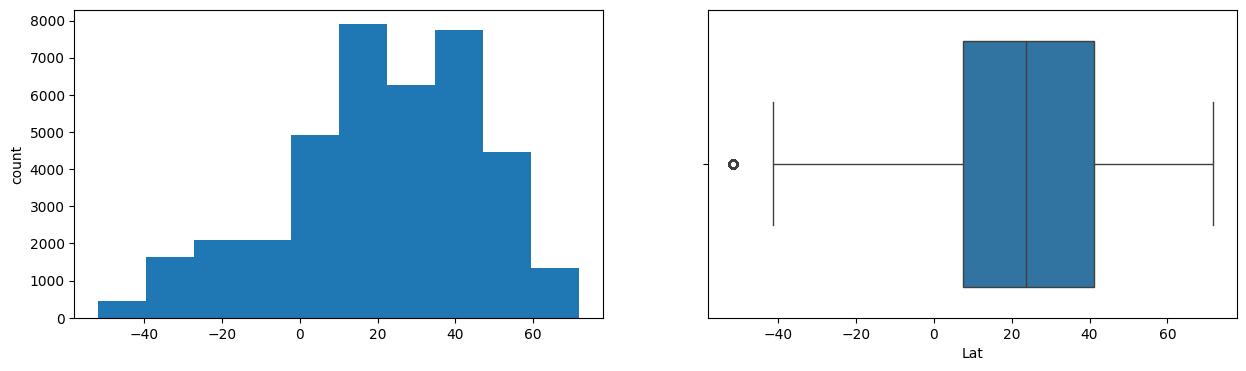

Long
Skew : -0.01


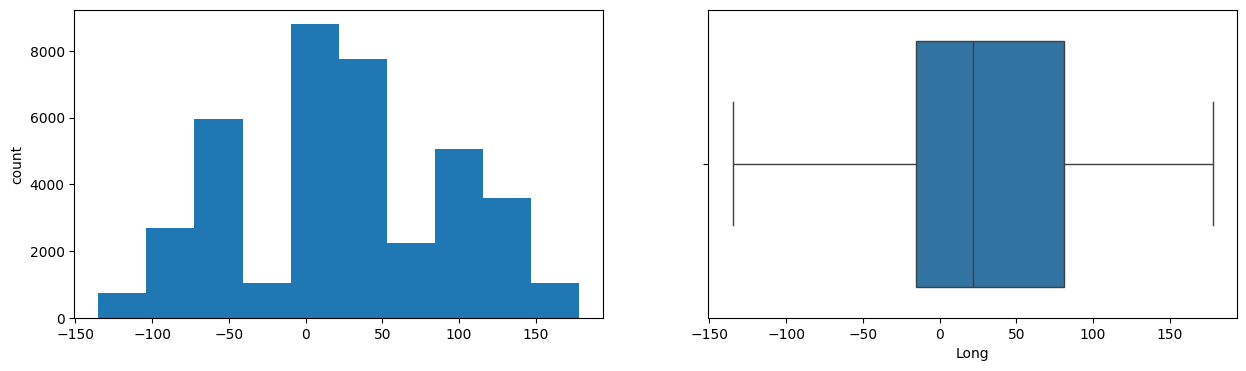

Confirmed
Skew : 19.52


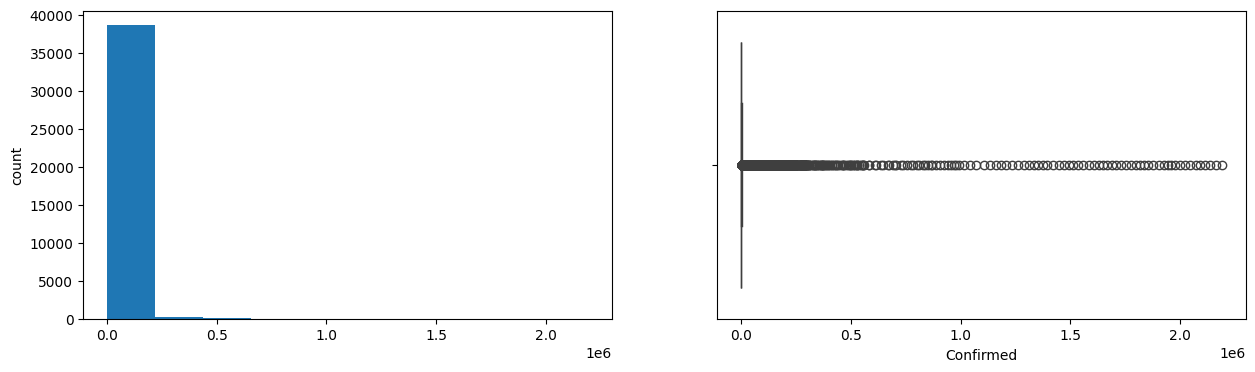

Deaths
Skew : 15.57


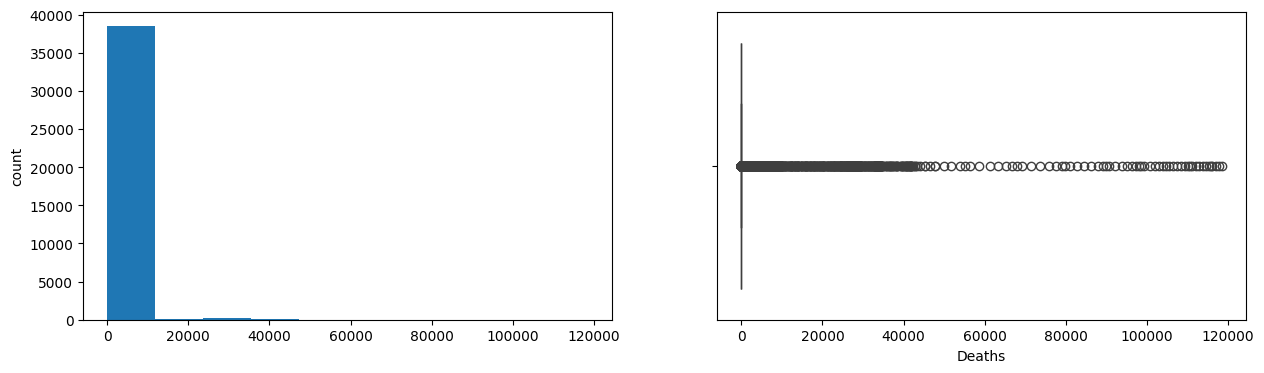

Recovered
Skew : 13.58


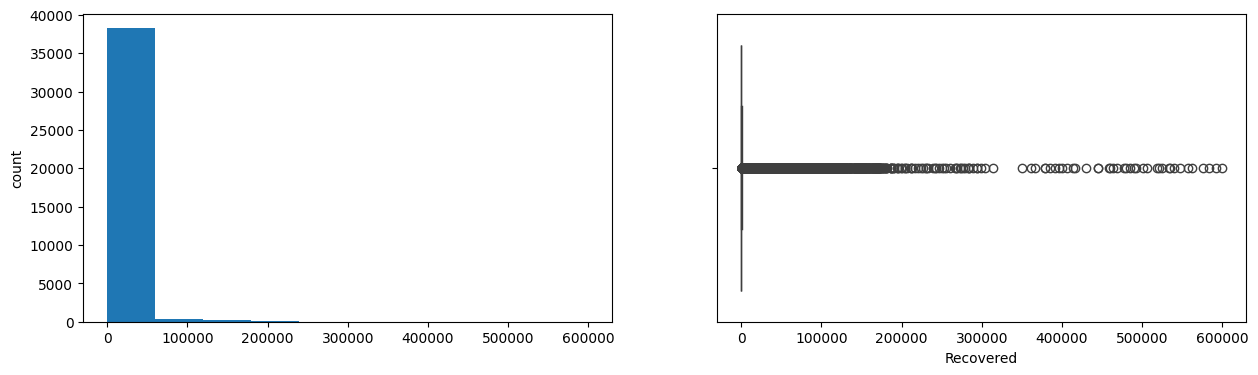

Active
Skew : 21.33


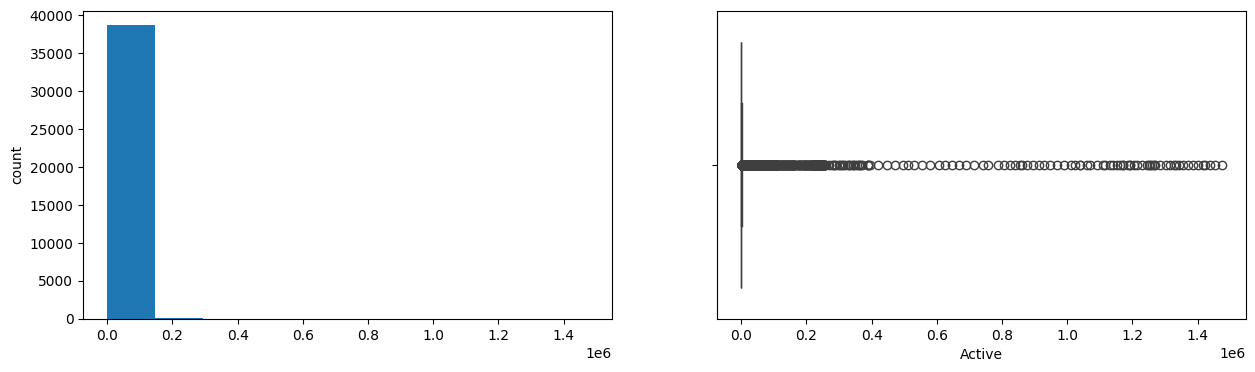

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
data.groupby("Province/State")["Confirmed"].sum().sort_values(ascending=False).plot.bar()

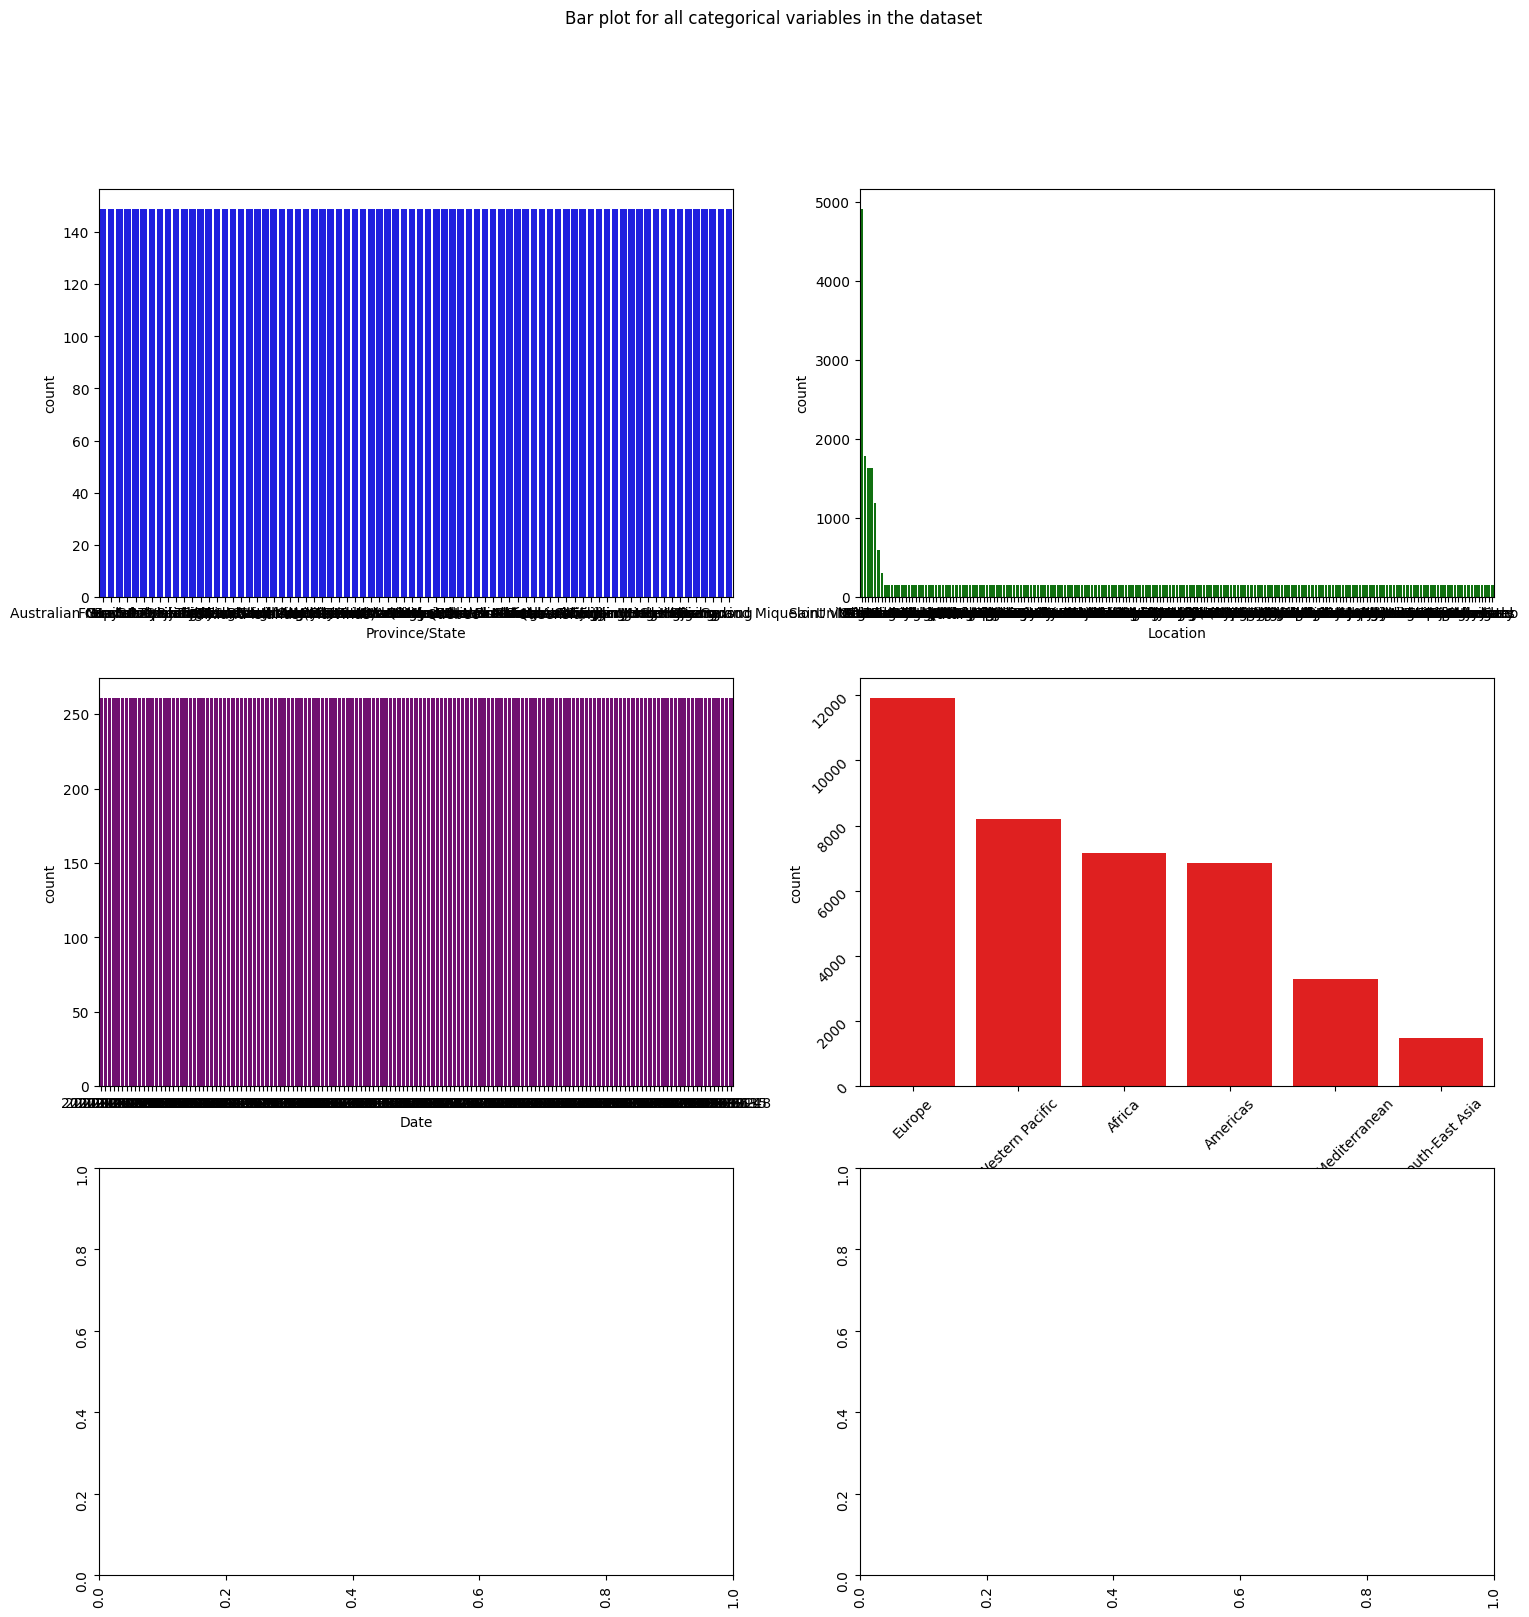

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Province/State', data = data, color = 'blue',
              order = data['Province/State'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Location', data = data, color = 'green',
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Date', data = data, color = 'purple',
              order = data['Date'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Continent', data = data, color = 'red',
              order = data['Continent'].value_counts().index);

axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

plt.figure(figsize=(14, 7))
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels to the right
data.groupby("Continent")["Confirmed"].sum().sort_values(ascending=False).plot.bar()

SORTING VARIABLES TO MAKE AN ANALYSIS UPON

<Axes: title={'center': 'Confirmed Cases in a Continent Over Time'}, xlabel='Continent'>

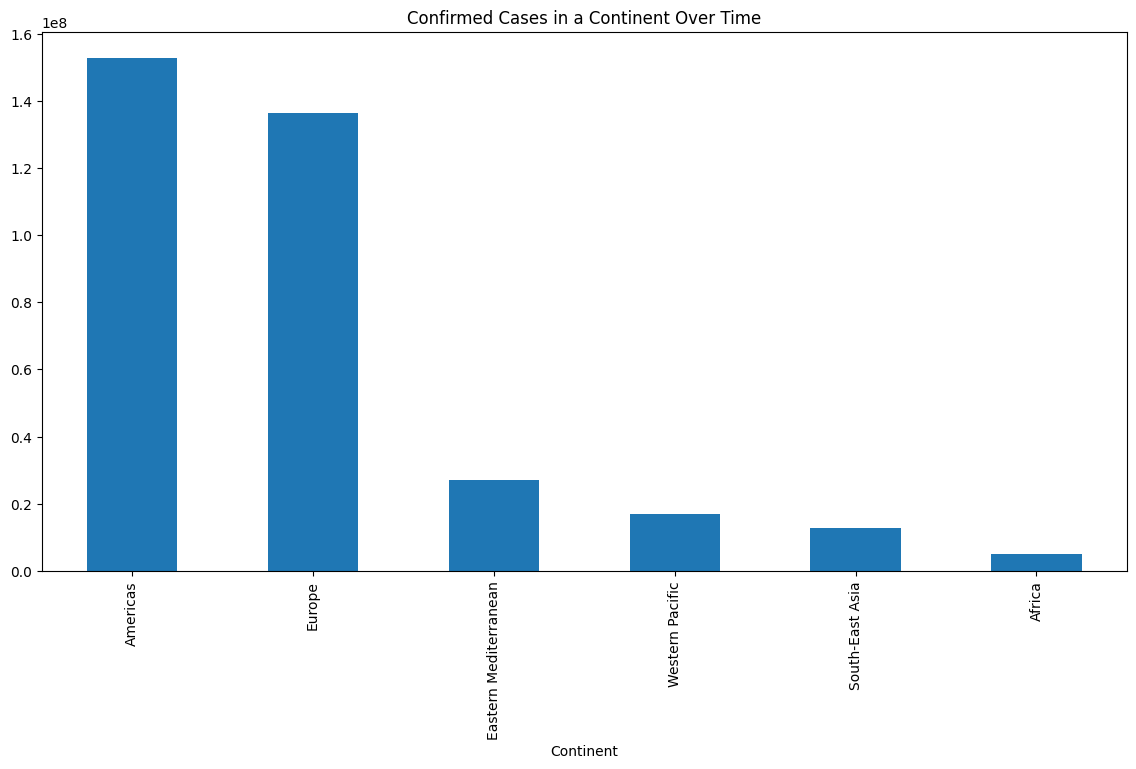

In [ ]:
plt.figure(figsize=(14, 7))
plt.title("Confirmed Cases in a Continent Over Time")
data.groupby("Continent")["Confirmed"].sum().sort_values(ascending=False).plot.bar()

<Axes: title={'center': 'Deaths Cases in a Continent Over Time'}, xlabel='Continent'>

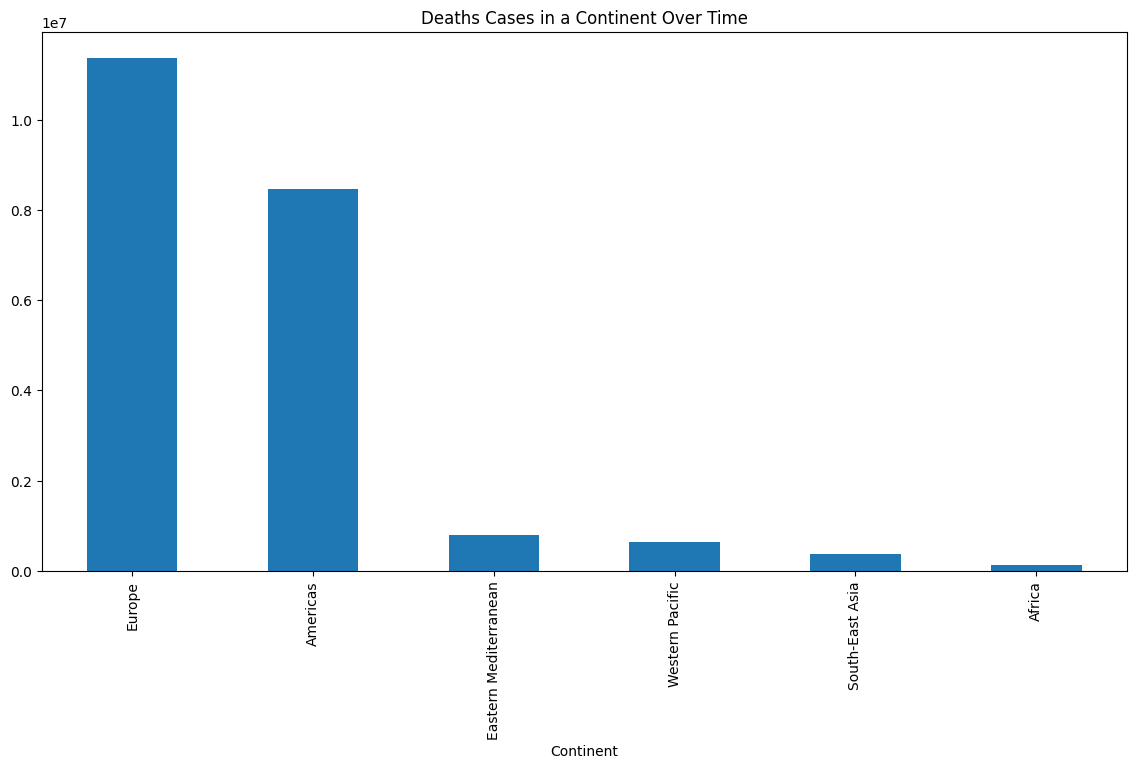

In [ ]:
plt.figure(figsize=(14, 7))
plt.title("Deaths Cases in a Continent Over Time")
data.groupby("Continent")["Deaths"].sum().sort_values(ascending=False).plot.bar()

In [ ]:
df = data[["Date","Confirmed","Deaths","Recovered","Active"]]

In [ ]:
df

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-22,0,0,0,0
2,2020-01-22,0,0,0,0
3,2020-01-22,0,0,0,0
4,2020-01-22,0,0,0,0
...,...,...,...,...,...
38884,2020-06-18,688,12,191,485
38885,2020-06-18,909,248,273,388
38886,2020-06-18,210,5,129,76
38887,2020-06-18,5279,51,3762,1466


STANDARDIZING DATE FORMAT

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.set_index(df['Date']).drop("Date",axis=1).resample('D').sum()

In [ ]:
df

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,555,17,28,510
2020-01-23,654,18,30,606
2020-01-24,941,26,36,879
2020-01-25,1434,42,39,1353
2020-01-26,2118,56,52,2010
...,...,...,...,...
2020-06-14,7911685,433375,3715556,3762754
2020-06-15,8033720,436883,3794955,3801882
2020-06-16,8173199,443669,3892350,3837180


VISUALIZATION OF INDIVIDUAL VARIABLE TRENDS OF THE ORIGINAL DATASET FROM FEBRUARY THROUGH JUNE.

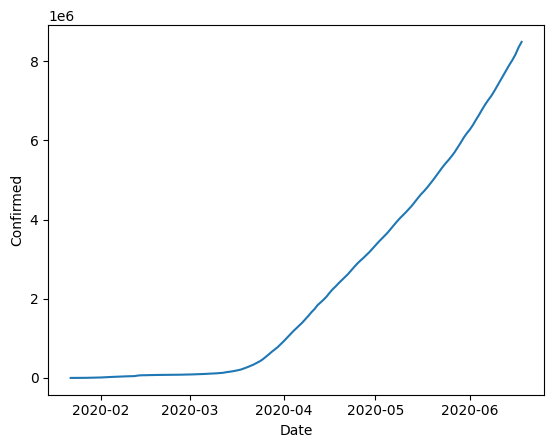

In [ ]:
sns.lineplot(df, x=df.index, y="Confirmed")
plt.grid(False)

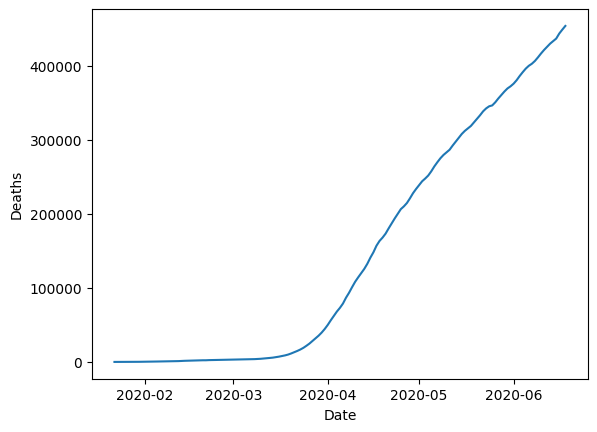

In [ ]:
sns.lineplot(df, x=df.index, y="Deaths")
plt.grid(False)

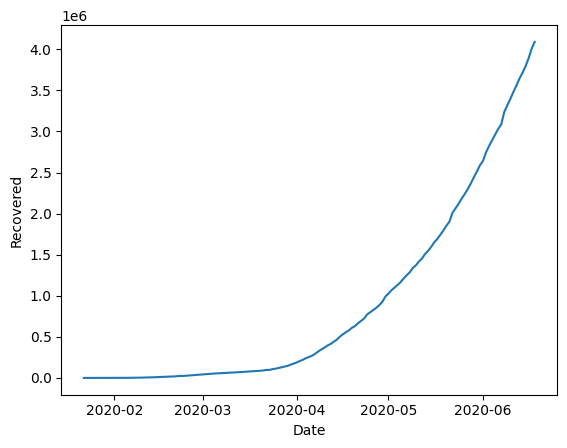

In [ ]:
sns.lineplot(df, x=df.index, y="Recovered")
plt.grid(False)

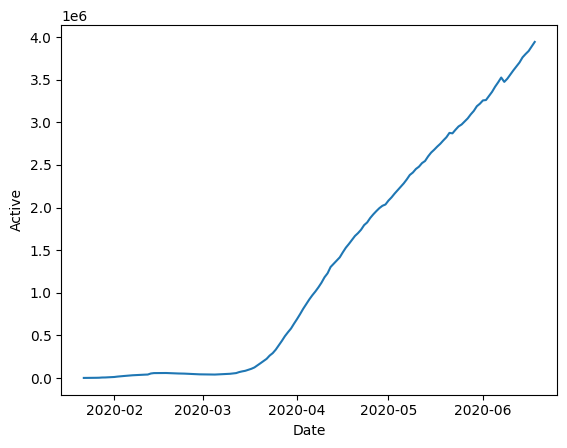

In [ ]:
sns.lineplot(df, x=df.index, y="Active")
plt.grid(False)

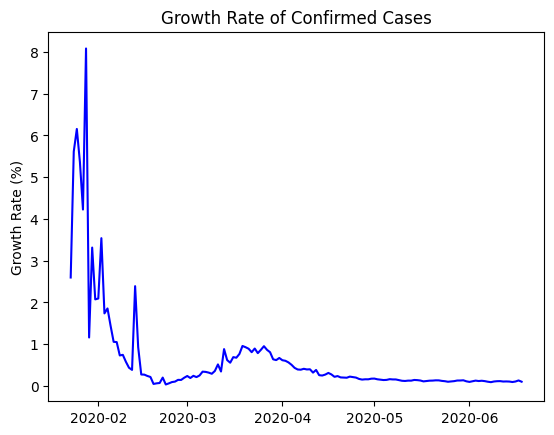

In [ ]:
df['Confirmed Growth Rate'] = (df["Confirmed"] - df["Confirmed"].shift(1)) / df["Confirmed"].shift(1) * 100
plt.plot(df.index, df['Confirmed Growth Rate'], linestyle='-', color='b')
plt.xlabel(None)
plt.ylabel('Growth Rate (%)')
plt.title("Growth Rate of Confirmed Cases")
plt.grid(False)

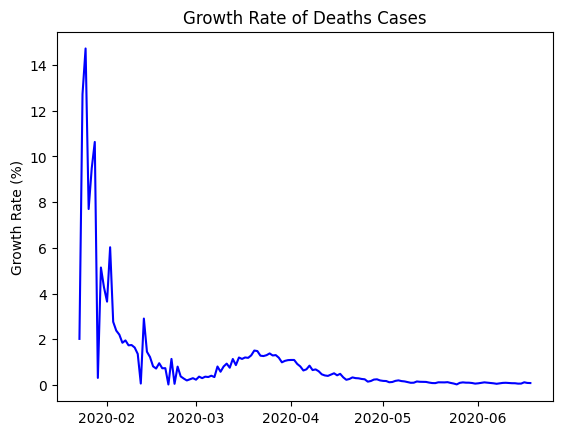

In [ ]:
df['Deaths Growth Rate'] = (df["Deaths"] - df["Deaths"].shift(1)) / df["Deaths"].shift(1) * 100
plt.plot(df.index, df['Deaths Growth Rate'], linestyle='-', color='b')
plt.xlabel(None)
plt.ylabel('Growth Rate (%)')
plt.title("Growth Rate of Deaths Cases")
plt.grid(False)

In [ ]:
df['Confirmed Growth Rate'] = (df["Confirmed"] - df["Confirmed"].shift(1)) / df["Confirmed"].shift(1) * 100
df['Deaths Growth Rate'] = (df["Deaths"] - df["Deaths"].shift(1)) / df["Deaths"].shift(1) * 100
df

,Confirmed,Deaths,Recovered,Active,Confirmed Growth Rate,Deaths Growth Rate
Date,,,,,,
2020-01-22,555,17,28,510,NaN,NaN
2020-01-23,654,18,30,606,17.837838,5.882353
2020-01-24,941,26,36,879,43.883792,44.444444
2020-01-25,1434,42,39,1353,52.391073,61.538462
2020-01-26,2118,56,52,2010,47.698745,33.333333
...,...,...,...,...,...,...
2020-06-14,7911685,433375,3715556,3762754,1.716927,0.777618
2020-06-15,8033720,436883,3794955,3801882,1.542465,0.809461
2020-06-16,8173199,443669,3892350,3837180,1.736170,1.553276


NOMALIZATION OF VARIABLES (LOG TRANSFORMATION)

In [ ]:
df = np.log(df)

In [ ]:
df

,Confirmed,Deaths,Recovered,Active,Confirmed Growth Rate,Deaths Growth Rate
Date,,,,,,
2020-01-22,6.318968,2.833213,3.332205,6.234411,NaN,NaN
2020-01-23,6.483107,2.890372,3.401197,6.406880,2.881322,1.771957
2020-01-24,6.846943,3.258097,3.583519,6.778785,3.781545,3.794240
2020-01-25,7.268223,3.737670,3.663562,7.210080,3.958736,4.119662
2020-01-26,7.658228,4.025352,3.951244,7.605890,3.864905,3.506558
...,...,...,...,...,...,...
2020-06-14,15.883851,12.979359,15.128039,15.140662,0.540536,-0.251519
2020-06-15,15.899158,12.987421,15.149183,15.151007,0.433382,-0.211387
2020-06-16,15.916371,13.002834,15.174524,15.160248,0.551681,0.440366


VISUALIZATION OF INDIVIDUAL VARIABLE AFTER NOMALITY TRANSFORMATION

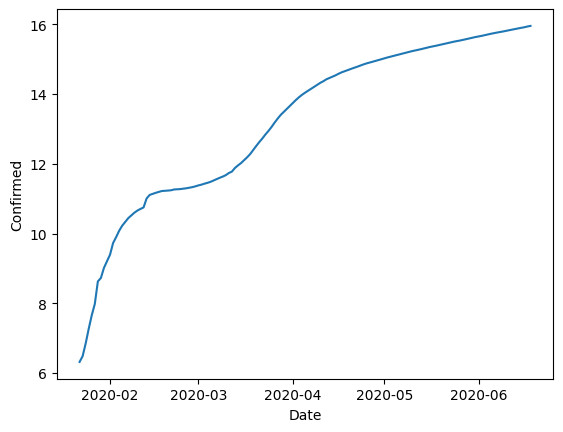

In [ ]:
sns.lineplot(df, x=df.index, y="Confirmed")
plt.grid(False)

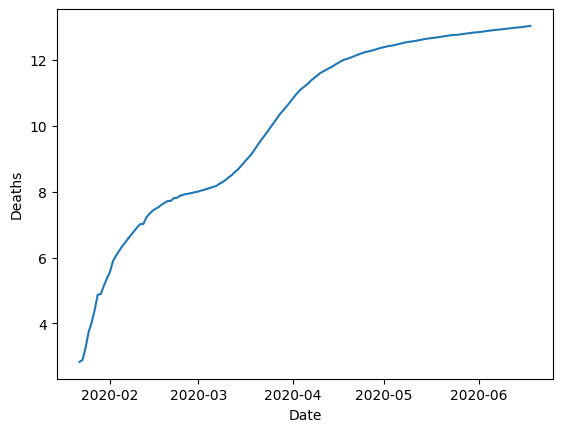

In [ ]:
sns.lineplot(df, x=df.index, y="Deaths")
plt.grid(False)

TRAINNIG AND TESTING THE DATA

In [ ]:
msk = (df.index < df.index[-30])
df_train = df[msk].copy()
df_test = df[~msk].copy()

ACF AND PACF TESTING

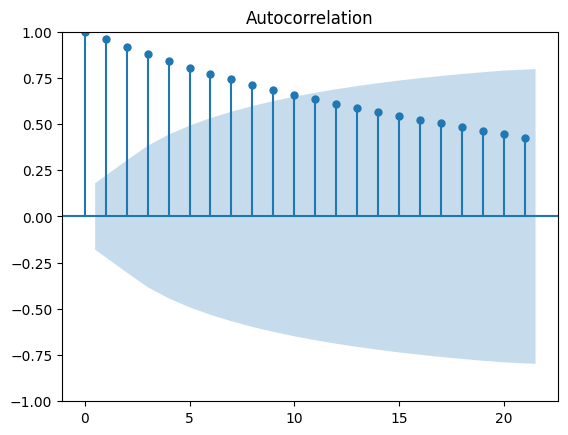

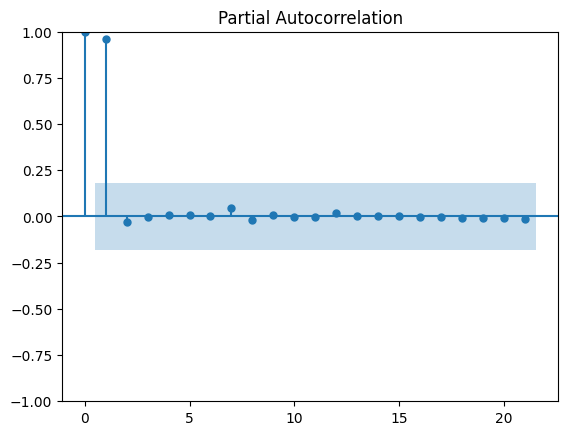

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(df_train["Confirmed"])
pacf_original = plot_pacf(df_train["Confirmed"])

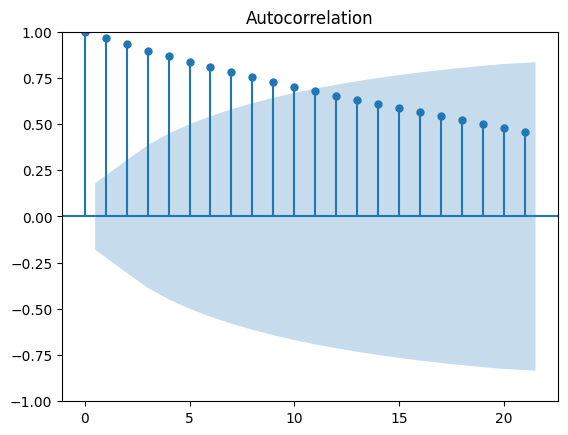

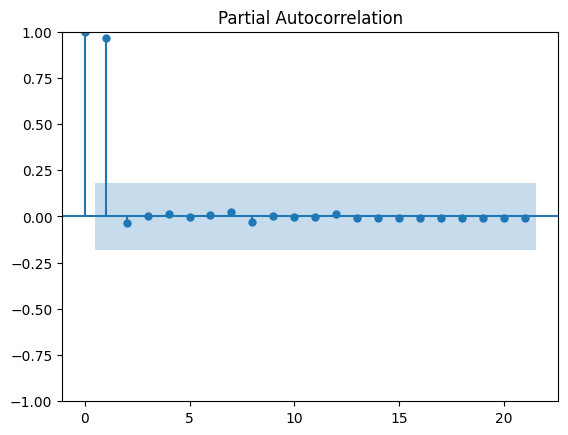

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(df_train["Deaths"])
pacf_original = plot_pacf(df_train["Deaths"])

ADF TESTING OF THE VARIABLES

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train["Confirmed"])
print(f'p-value: {adf_test[1]}')

p-value: 0.6220977809797604


In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train["Deaths"])
print(f'p-value: {adf_test[1]}')

p-value: 0.38225667553172427


DIFFERENTIATING THE VARIABLES FOR STATIONARITY REQUIREMENT

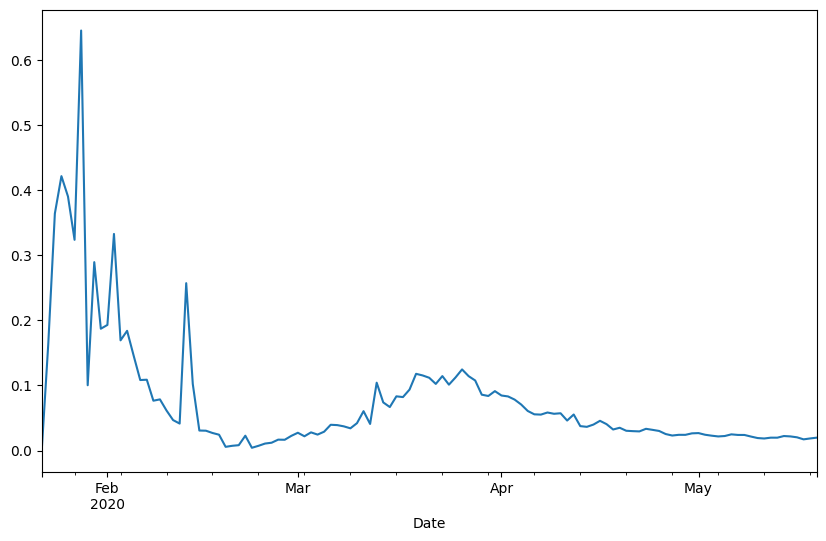

In [ ]:
df_train_diff_conf = df_train["Confirmed"].diff().fillna(0)
df_train_diff_conf.plot(figsize=(10, 6)) # Changed df_train_diff to df_train_diff_conf
plt.show()

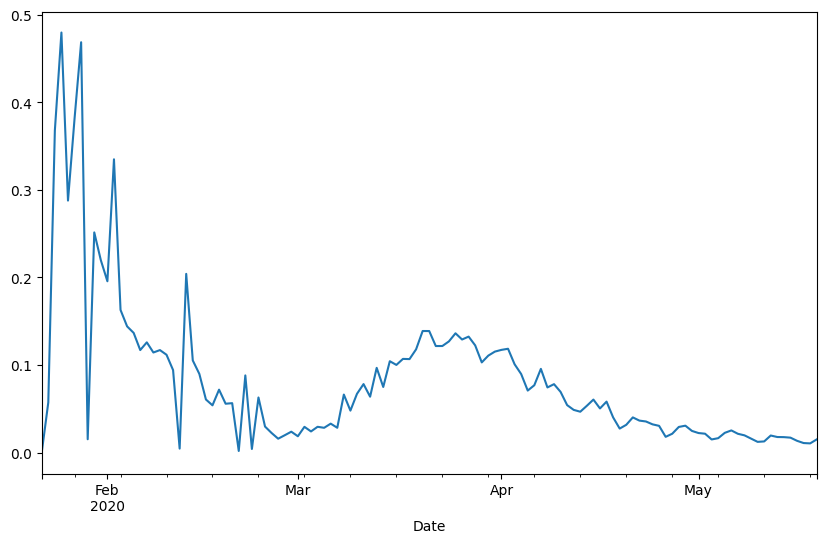

In [ ]:
df_train_diff_death = df_train["Deaths"].diff().fillna(0)
df_train_diff_death.plot(figsize=(10, 6))
plt.show()

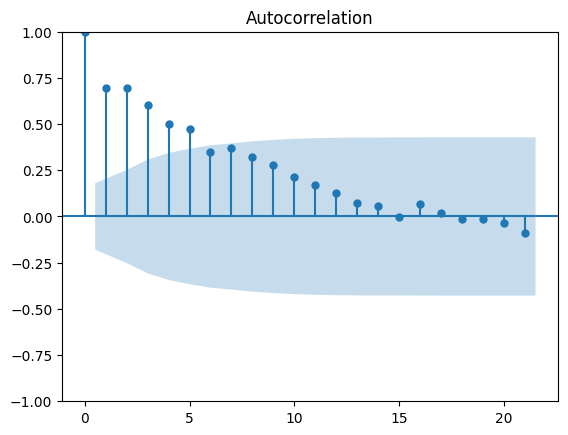

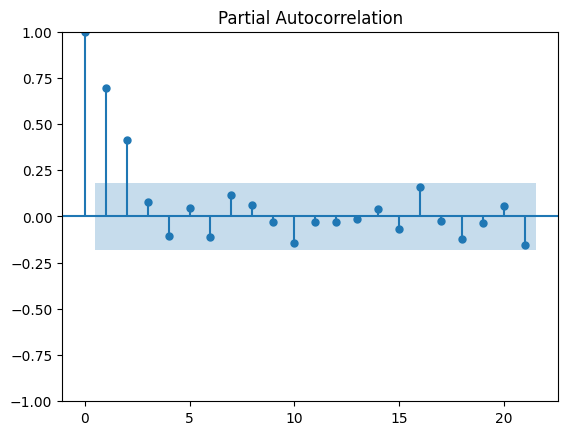

In [ ]:
acf_diff_conf = plot_acf(df_train_diff_conf)
pacf_diff_conf = plot_pacf(df_train_diff_conf)

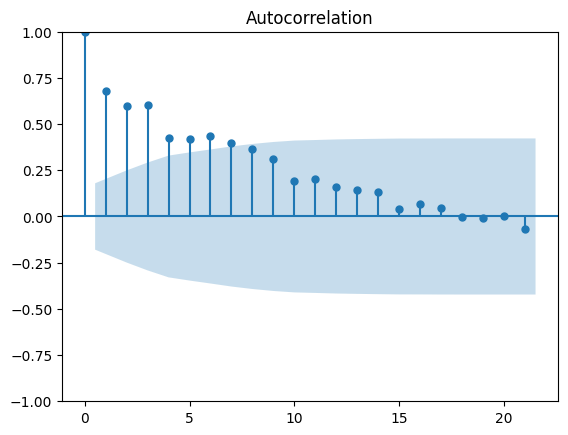

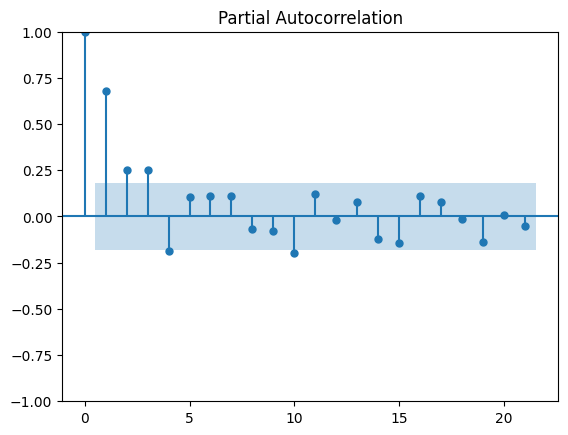

In [ ]:
acf_diff_death = plot_acf(df_train_diff_death)
pacf_diff_daeth = plot_pacf(df_train_diff_death)

In [ ]:
adf_test = adfuller(df_train_diff_conf)
print(f'p-value: {adf_test[1]}')

p-value: 0.09314259434084032


In [ ]:
adf_test = adfuller(df_train_diff_death)
print(f'p-value: {adf_test[1]}')

p-value: 0.08606349399759478


ARIMA(2,1,0)(0,0,0)[0] MODEL TESTING (FORECAST MODEL)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
Model = ARIMA(df_train["Confirmed"], order=(2,1,0))
Model = Model.fit()
print(Model.summary())

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  119
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 165.517
Date:                Wed, 27 Nov 2024   AIC                           -325.033
Time:                        18:56:41   BIC                           -316.721
Sample:                    01-22-2020   HQIC                          -321.658
                         - 05-19-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3715      0.032     11.723      0.000       0.309       0.434
ar.L2          0.5586      0.039     14.176      0.000       0.481       0.636
sigma2         0.0035      0.000     18.738      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
Model = ARIMA(df_train["Deaths"], order=(2,1,0))
Model = Model.fit()
print(Model.summary())

                               SARIMAX Results                                
Dep. Variable:                 Deaths   No. Observations:                  119
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 161.262
Date:                Wed, 27 Nov 2024   AIC                           -316.525
Time:                        18:57:08   BIC                           -308.213
Sample:                    01-22-2020   HQIC                          -313.150
                         - 05-19-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4780      0.035     13.608      0.000       0.409       0.547
ar.L2          0.4219      0.045      9.287      0.000       0.333       0.511
sigma2         0.0038      0.000     22.552      0.0

RESIDUAL TESTING

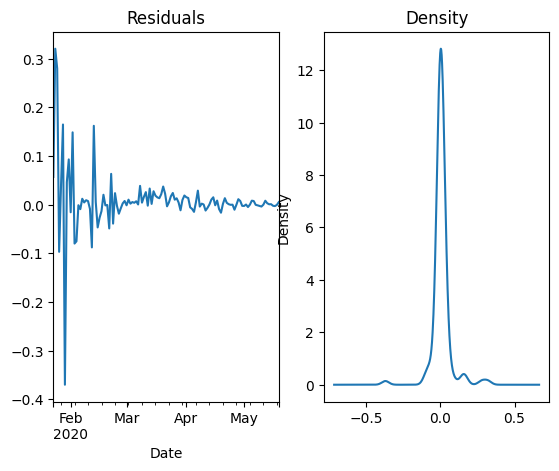

In [ ]:
residuals = Model.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(title="Density", kind='kde', ax=ax[1])
plt.show()

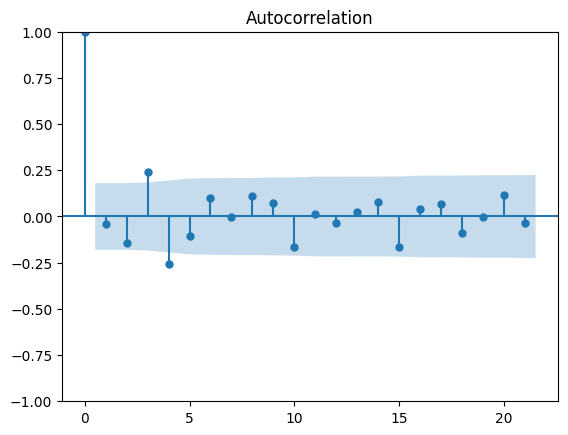

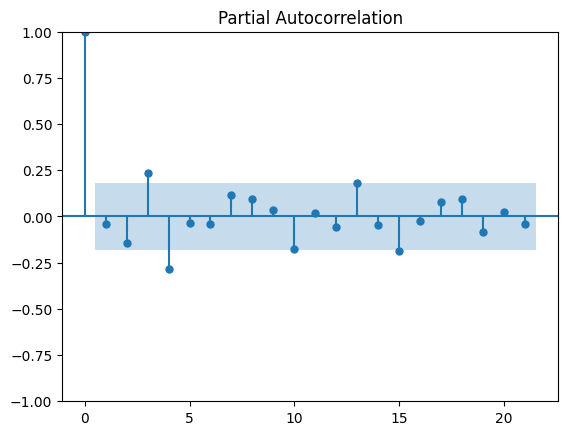

In [ ]:
acf_residuals = plot_acf(residuals)
pacf_residuals = plot_pacf(residuals)

VISUALIZATION OF FORECAST MODEL

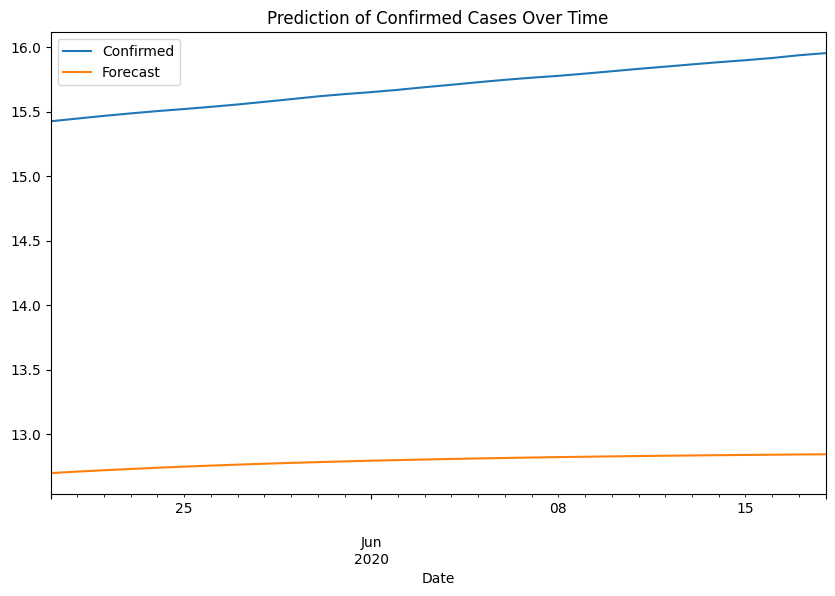

In [ ]:
forecast = Model.forecast(steps=len(df_test))
df_test["Forecast"] = forecast
df_test[["Confirmed", "Forecast"]].plot(figsize=(10, 6))
plt.title("Prediction of Confirmed Cases Over Time")
plt.show()

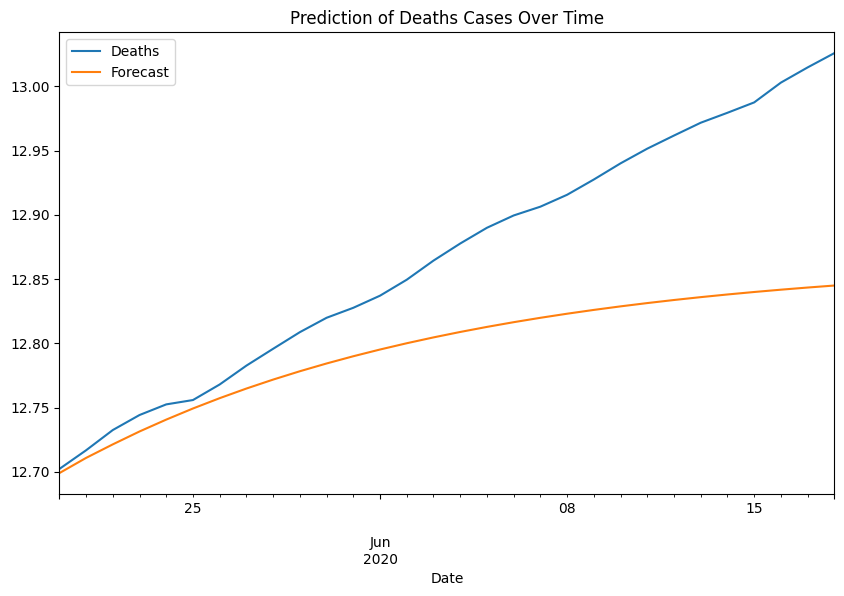

In [ ]:
forecast = Model.forecast(steps=len(df_test))
df_test["Forecast"] = forecast
df_test[["Deaths", "Forecast"]].plot(figsize=(10, 6))
plt.title("Prediction of Deaths Cases Over Time")
plt.show()

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

AUTO FORECAST MODEL

In [ ]:
from pmdarima.arima import auto_arima # Import the function
auto_arima = auto_arima(df_train["Confirmed"], seasonal=False, trace=False)

In [ ]:
print(auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  119
Model:               SARIMAX(4, 2, 4)   Log Likelihood                 195.805
Date:                Wed, 27 Nov 2024   AIC                           -373.610
Time:                        19:08:01   BIC                           -348.750
Sample:                    01-22-2020   HQIC                          -363.517
                         - 05-19-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2165      0.064      3.362      0.001       0.090       0.343
ar.L2         -0.4585      0.067     -6.871      0.000      -0.589      -0.328
ar.L3          0.5336      0.076      6.987      0.0

In [ ]:
from pmdarima.arima import auto_arima # Import the function
auto_arima = auto_arima(df_train["Deaths"], seasonal=False, trace=False)

In [ ]:
print(auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  119
Model:               SARIMAX(4, 2, 4)   Log Likelihood                 195.805
Date:                Wed, 27 Nov 2024   AIC                           -373.610
Time:                        19:07:16   BIC                           -348.750
Sample:                    01-22-2020   HQIC                          -363.517
                         - 05-19-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2165      0.064      3.362      0.001       0.090       0.343
ar.L2         -0.4585      0.067     -6.871      0.000      -0.589      -0.328
ar.L3          0.5336      0.076      6.987      0.0

VISUALIZATION OF FORECAST AND AUTO - FORECAST MODELS

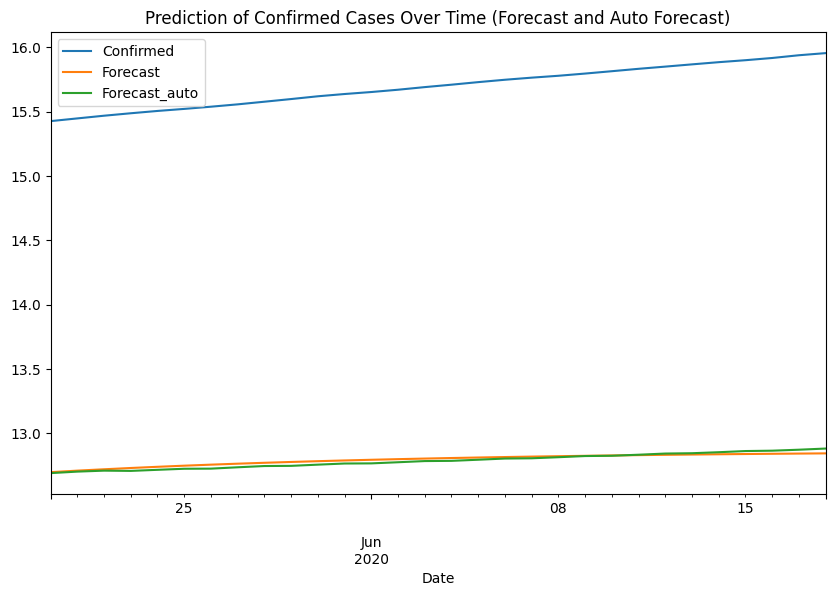

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df_test["Forecast_auto"] = forecast_test_auto
df_test[["Confirmed", "Forecast", "Forecast_auto"]].plot(figsize=(10, 6))
plt.title("Prediction of Confirmed Cases Over Time (Forecast and Auto Forecast)")
plt.show()

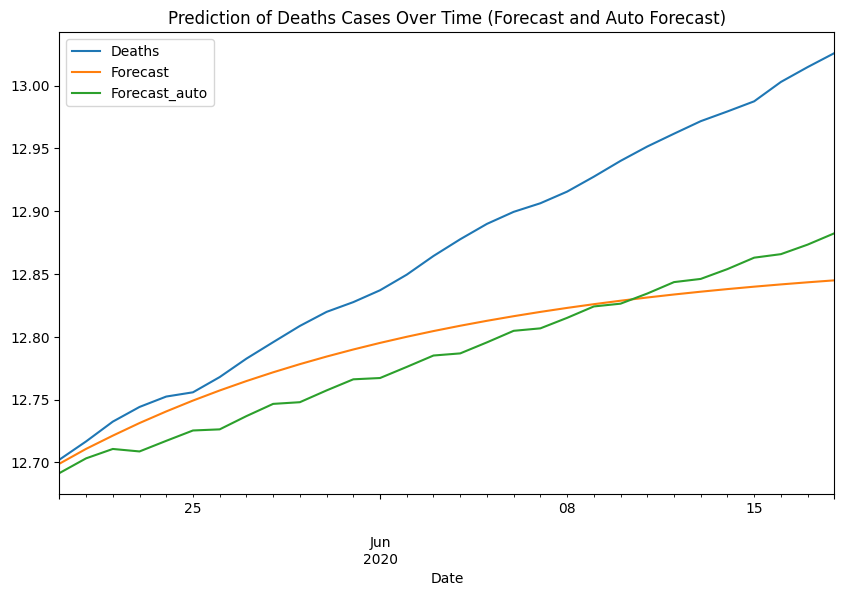

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df_test["Forecast_auto"] = forecast_test_auto
df_test[["Deaths", "Forecast", "Forecast_auto"]].plot(figsize=(10, 6))
plt.title("Prediction of Deaths Cases Over Time (Forecast and Auto Forecast)")
plt.show()

EVALUATION OF MODELS (ARIMA(2,1,0)(0,0,0)[0] AND ARIMA(4,2,4)(0,0,0)[0])

In [ ]:
from  sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

mse_Conf = mean_squared_error(df_test["Confirmed"], df_test["Forecast"])
mse_Deaths = mean_squared_error(df_test["Deaths"], df_test["Forecast"])

print(f"MSE1: {mse_Conf}")
print(f"MSE2: {mse_Deaths}")


MSE1: 8.427921800145636
MSE2: 0.008273591646953968


In [ ]:
mse_Conf = mean_squared_error(df_test["Confirmed"], df_test["Forecast_auto"])
mse_Deaths = mean_squared_error(df_test["Deaths"], df_test["Forecast_auto"])

print(f"MSE1: {mse_Conf}")
print(f"MSE2: {mse_Deaths}")

MSE1: 8.473802653053339
MSE2: 0.008065594949979348
